In [2]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import imageio
import os

In [2]:
def create_randwalk_frames(time: list,x: list,y: list,name: str):
    """
    Creates frames for a gif image of a random walk.
    

    Parameters
    ----------
    time : list
        List of time points.

    x : list
        List of steps in x direction.
    
    y : list
        List of steps in y direction.

    name : str
        List of time points.

    Returns
    -------
    None
    """
    #add number of steps
    fig = plt.figure(figsize=(6, 6))
    for t in time:
        if t == max(time):
            clr='red'
            lbl='Stop'
            alph=1
            z_order=t
        elif t==min(time):
            clr='green'
            lbl='Start'
            alph=1
            z_order=max(time)+2
        else:
            clr='black'
            lbl=''
            alph=0.2
            z_order=t
        path_x=np.cumsum(x) 
        path_y=np.cumsum(y)
        plt.plot(path_x[:(t+1)], path_y[:(t+1)], color = 'grey' )
        plt.plot(path_x[t], path_y[t], color = clr, marker = 'o' ,label=lbl,alpha=alph,zorder=z_order) 
        #if t==min(time) or t==min(time):
            #plt.text(x+0.3,y+0.3,lbl,fontsize=9)
        x_limit=max(np.abs(min(path_x)),np.abs(max(path_x)))+1
        y_limit=max(np.abs(min(path_y)),np.abs(max(path_y)))+1
        max_limit=max(x_limit,y_limit)
        plt.xlim([-max_limit,max_limit])
        plt.xlabel('x', fontsize = 14)
        plt.ylim([-max_limit,max_limit])
        plt.ylabel('y', fontsize = 14)
        #plt.plot([], [], ' ', label=f'Step:{t}')
        if t == max(time):
            plt.legend()
        plt.title(f'Random walk on square lattice',
                fontsize=14)    
        plt.savefig(f'/work/DPCN/LAB4/images/{name}_{t}.png', 
                    transparent = False,  
                    facecolor = 'white'
                )
    
    plt.close()

In [3]:
#Data for creating a random walk
N = 50
u = 2*np.random.randint(0,2,size=(N,2))-1
time=range(N)
x=u[:,0]
path_x=np.cumsum(x)
y=u[:,1]
create_randwalk_frames(time,x,y,'GIF')
#os.getcwd()
#print(path_x)

In [4]:
#creating gif image

frames = []
for t in time:
    image = imageio.v2.imread(f'/work/DPCN/LAB4/images/GIF_{t}.png')
    frames.append(image)

imageio.mimsave('/work/DPCN/LAB4/example_task1.gif', # output gif
                frames,
                format='GIF',          # array of input frames
                duration=5,)         # optional: frames per second

In [176]:
def pearsonRandWalk(N: int):
    """
    Creates one trajectory of pearson random walk of N steps.
    

    Parameters
    ----------
    N : int
        Number of steps of a random walk.

    Returns
    -------
    postitions: nparray
        Array representing the path of a pearson random walk.
    """
    angles=np.random.uniform(0,2*np.pi,N-1)
    steps=[(0,0)]
    for i in range(0,N-1):
        xr = np.cos(angles[i])
        yr = np.sin(angles[i])
        steps.append((xr,yr))
    directs=np.array(steps)
    postitions=np.cumsum(directs,axis=0)
    return postitions



In [177]:

N=1000



def pearsSim(n: int,N: int):
    """
    Function to simulate A and B parameter in n simulations of pearson random walk of N steps.
    

    Parameters
    ----------
    n : int
        Number of simulations.

    N : int
        Number of steps of the pearson random walk.

    Returns
    -------
    As : list
        List of As calculated in the simulation.

    Bs: list
        List of Bs calculated in the simulation.
    """
    As=[]
    Bs=[]
    for j in range(n):
        A=0
        B=0
        C=0
        res=pearsonRandWalk(N)
        
        for r in res:
            C+=1
            if r[0]>0:
                A+=1
                if r[1]>0:
                    B+=1
        As.append(A/C)
        Bs.append(B/C)
    return As,Bs






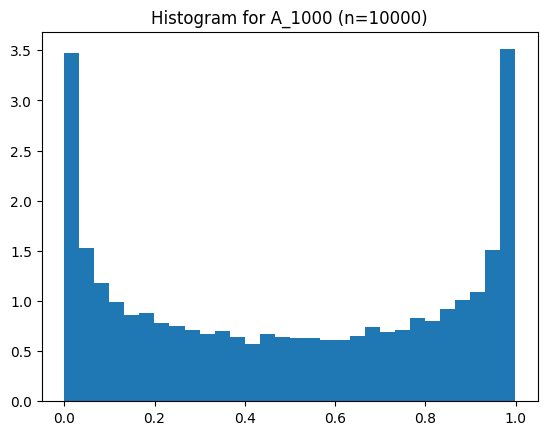

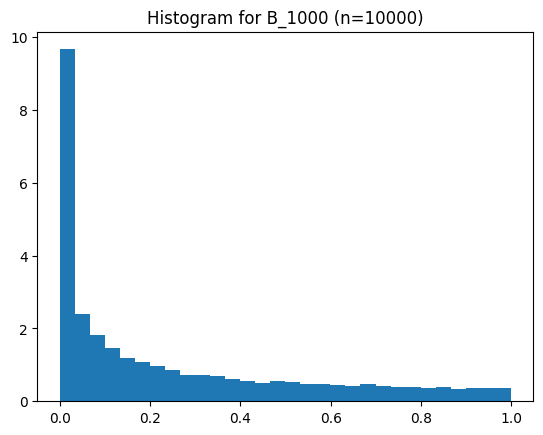

In [178]:
#Creating histograms of As and Bs

n=10000

As,Bs=pearsSim(n,N)

plt.figure(1)
plt.title("Histogram for A_1000 (n=10000)")
plt.hist(As,bins=30,density=True)

plt.figure(2)
plt.title("Histogram for B_1000 (n=10000)")
plt.hist(Bs,bins=30,density=True)
plt.show()

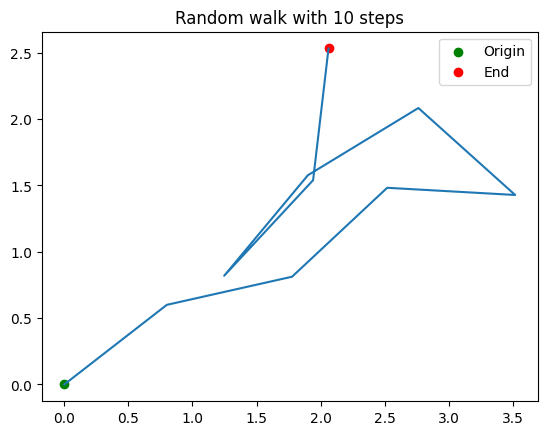

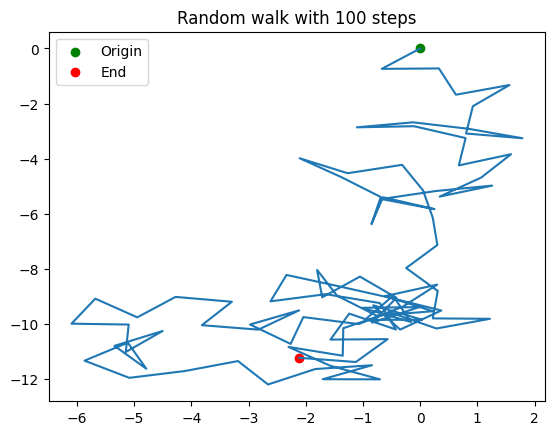

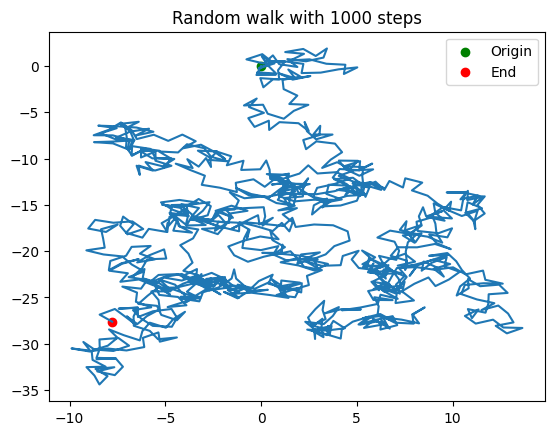

In [27]:
#Ilustrating several trajectories

res=pearsonRandWalk(10)
x=[res[i][0] for i in range(len(res))]
y=[res[i][1] for i in range(len(res))]
plt.figure(1)
plt.title("Random walk with 10 steps")
plt.scatter(0,0,c='g',label='Origin')
plt.scatter(x[-1],y[-1],c='r',label='End')
plt.plot(x,y)
plt.legend()

res=pearsonRandWalk(100)
x=[res[i][0] for i in range(len(res))]
y=[res[i][1] for i in range(len(res))]
plt.figure(2)
plt.title("Random walk with 100 steps")
plt.scatter(0,0,c='g',label='Origin')
plt.scatter(x[-1],y[-1],c='r',label='End')
plt.plot(x,y)
plt.legend()

res=pearsonRandWalk(1000)
x=[res[i][0] for i in range(len(res))]
y=[res[i][1] for i in range(len(res))]
plt.figure(3)
plt.title("Random walk with 1000 steps")
plt.scatter(0,0,c='g',label='Origin')
plt.scatter(x[-1],y[-1],c='r',label='End')
plt.plot(x,y)
plt.legend()

plt.show()


In [182]:
def create_graph_randwalk_frames(time: list,G: nx.graph,start: int):
    """
    Creates frames for a gif image of and simulates random walk on a graph.
    

    Parameters
    ----------
    time : list
        List of time steps.

    G : graph_object
        Graph on which the random walk will take place.

    start : int
        Number representing the starting node.


    Returns
    -------
    None
    """
    fig = plt.figure(figsize=(6, 6))
    curr=start
    #edge_list=G.edges()
    
    for t in time:
        
        val_map={}
        neighbors=[n for n in G.neighbors(curr)]
        curr=neighbors[np.random.randint(len(neighbors))]
        if curr not in val_map:
            val_map.update({curr:1.0})

        values = [val_map.get(node, 0.25) for node in G.nodes()]

        nx.draw_circular(G, cmap=plt.get_cmap('viridis'), node_color=values, with_labels=True, font_color='white')
        
        
        plt.savefig(f'/work/DPCN/LAB4/images/GIF_{t}.png', 
                transparent = False,  
                facecolor = 'white'
            )
    
    plt.close()

In [184]:
###SAMPLE GRAPHS FOR RANDOM WALKS

G1=nx.gnp_random_graph(20,0.2)
G2=nx.watts_strogatz_graph(20,4,0.5)
G3=nx.barabasi_albert_graph(20,3)

time=range(20)

In [191]:

def gif_creator(time: list,name: str):
    """
    Creates a gif of a given name from current temporary frames.
    

    Parameters
    ----------
    time : list
        List of time steps.

    n : str
        Name of the gif file.

    Returns
    -------
    None
    """
    frames = []
    for t in time:
        image = imageio.v2.imread(f'/work/DPCN/LAB4/images/GIF_{t}.png')
        frames.append(image)

    imageio.mimsave(f'/work/DPCN/LAB4/{name}.gif', # output gif
                    frames,
                    format='GIF', duration=1000       # array of input frames
             )         # optional: frames per second

In [187]:
#For random graph
create_graph_randwalk_frames(time,G1,0)
gif_creator(time,'example1_task3')

In [188]:
#For Watts-Strogatz
create_graph_randwalk_frames(time,G2,0)
gif_creator(time,'example2_task3')

In [189]:
#For Barabasi-Albert

create_graph_randwalk_frames(time,G3,0)
gif_creator(time,'example3_task3')

In [190]:
#Sample graphs for hitting times

G1=nx.complete_graph(100)
G2=nx.watts_strogatz_graph(100,4,0.5)
G3=nx.barabasi_albert_graph(100,3)

In [192]:
def avg_hit_time(G: nx.graph,start: int,N: int):
    """
    Creates frames for a gif image of a random walk.
    

    Parameters
    ----------
    G : graph_object
        Graph that the random walk takes place on.

    start : int
        Number representing starting node.

    N : int
        Number of steps of simulations.

    Returns
    -------
    avg_hits : dict
        Dictonary of pairs {node:average hit time}.
        
    """
    avg_hits={}    
    for i in range(N):
        curr=start
        seen=[curr]

        step=0
        hits={curr:step}

        while len(seen)<len(G.nodes):
            step+=1
            neighbors=[n for n in G.neighbors(curr)]
            curr=neighbors[np.random.randint(len(neighbors))]
            if curr not in seen:
                seen.append(curr)
                hits[curr]=step
        for key in hits.keys():
            
            if key not in avg_hits.keys():
                avg_hits[key]=hits[key]/N
            else:
                avg_hits[key]+=hits[key]/N
    return avg_hits


In [193]:
#For complete graph
avg_hit_time(G1,0,1000)

{0: 0.0,
 99: 100.65699999999997,
 4: 92.61900000000014,
 98: 98.69100000000016,
 44: 96.13700000000024,
 75: 105.56100000000012,
 87: 104.75200000000001,
 35: 104.61100000000027,
 21: 97.44100000000036,
 86: 96.97300000000013,
 49: 103.62100000000012,
 77: 102.30100000000006,
 10: 100.84900000000002,
 97: 95.73600000000015,
 96: 95.41300000000007,
 72: 95.56500000000014,
 90: 98.23800000000024,
 30: 97.98100000000008,
 31: 100.35299999999994,
 32: 96.32700000000031,
 69: 100.62700000000011,
 24: 98.90800000000017,
 95: 98.62000000000015,
 63: 96.97600000000014,
 11: 99.36200000000011,
 50: 102.64500000000002,
 94: 95.21700000000011,
 5: 93.58500000000011,
 26: 101.386,
 58: 100.19900000000011,
 16: 98.40000000000012,
 7: 103.73000000000002,
 79: 102.94900000000008,
 47: 100.89900000000004,
 71: 95.04800000000004,
 43: 99.6910000000001,
 42: 96.58199999999995,
 15: 101.41100000000009,
 56: 95.53199999999994,
 65: 97.32299999999998,
 78: 106.77400000000013,
 28: 101.55400000000002,
 93:

In [194]:
#For Watts-Strogatz

avg_hit_time(G2,0,1000)

{0: 0.0,
 69: 83.66200000000015,
 71: 149.28500000000003,
 70: 101.02100000000014,
 75: 98.3110000000001,
 88: 86.04300000000019,
 87: 132.44099999999995,
 34: 129.89900000000006,
 32: 299.185,
 1: 224.06999999999994,
 33: 232.5409999999999,
 76: 304.021,
 78: 149.4350000000001,
 77: 281.0579999999997,
 59: 125.96400000000024,
 3: 139.42000000000033,
 6: 179.34099999999998,
 39: 106.89700000000012,
 4: 139.34700000000012,
 81: 82.55000000000008,
 97: 92.24599999999985,
 99: 126.466,
 96: 107.8030000000001,
 98: 79.60000000000007,
 37: 89.54200000000006,
 84: 156.06000000000017,
 83: 155.5010000000001,
 14: 207.40699999999984,
 15: 179.32199999999986,
 16: 170.64400000000006,
 17: 178.95999999999992,
 41: 210.41299999999993,
 43: 121.54400000000004,
 42: 164.07399999999967,
 40: 137.284,
 22: 139.97100000000015,
 38: 90.12900000000016,
 51: 253.33899999999988,
 53: 116.50000000000011,
 48: 183.50900000000013,
 47: 191.04399999999967,
 95: 145.2889999999999,
 93: 127.66099999999994,
 91:

In [195]:
#For Barabasi-Albert

avg_hit_time(G3,0,1000)

{0: 0.0,
 72: 197.7839999999998,
 50: 159.70200000000017,
 14: 61.12100000000008,
 78: 228.66799999999995,
 26: 92.02299999999997,
 75: 161.73899999999992,
 23: 98.16000000000015,
 12: 75.45000000000005,
 58: 171.85399999999973,
 69: 165.91499999999988,
 60: 136.89199999999994,
 1: 34.936,
 5: 51.53000000000004,
 3: 37.979999999999976,
 16: 138.689,
 11: 65.25100000000002,
 54: 182.05000000000035,
 41: 116.09900000000025,
 17: 67.57700000000008,
 34: 104.2910000000001,
 92: 235.58399999999978,
 82: 219.04599999999994,
 7: 41.541999999999994,
 44: 188.46499999999992,
 95: 223.58900000000028,
 56: 156.56399999999982,
 8: 69.08600000000011,
 64: 191.0819999999998,
 87: 217.86599999999981,
 4: 18.275999999999975,
 2: 46.669999999999945,
 27: 113.54000000000015,
 28: 158.0700000000001,
 18: 99.92800000000011,
 65: 212.58999999999995,
 9: 45.78400000000003,
 15: 93.76800000000019,
 83: 225.88499999999988,
 39: 133.29500000000013,
 61: 144.31099999999992,
 6: 53.188000000000116,
 30: 106.2700

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2be72a1a-6ede-4702-bb85-1f84486961ea' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>